In [16]:
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import itertools
import matplotlib as plt
from tensorflow.python.client import device_lib
from keras.preprocessing import image
from PIL import Image, ImageDraw
from keras.models import model_from_json
from keras.models import load_model
import os
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np

Populating the interactive namespace from numpy and matplotlib


C:\Users\yk_l\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
new_model = load_model('last.h5')

In [14]:
def pred(filename, index, new_model):
    img = Image.open(filename)
    w,h = img.size
    #1920  1080

    j_size = 100
    i_size = 100
    count = 0
    array = []
    
    i = 500
    j = 250

    while i < 1500:
        while j < h:
            count += 1
            frame = img.crop(((i, j, i+i_size ,j+j_size ))).resize((224,224))
        
            x = np.array(frame)
            x = np.expand_dims(x, axis = 0)
            classes = new_model.predict(x)
            if(classes[0][0] > 0.9):
                array.append([i, j, i+i_size ,j+j_size])
                #frame.save('further_train/'+str(index)+'_'+ str(count) + '.jpg') 
            j +=j_size/2
        i+=i_size/2
        j = 0
    img.close()
    return array

In [27]:
def drawpred(filename, array):
    img = Image.open(filename)
    for item in array:
    
        draw = ImageDraw.Draw(img)
        draw.rectangle(item, outline=128)
        del draw
    img.save('result.jpg')
    img.close()

#    img.show()
#     im = np.array(img, dtype=np.uint8)
#     fig, ax = plt.subplots(1)
#     ax.imshow(im)
#     plt.show()
#     img.save('result.jpg')

In [28]:
def one_img_pred(filename,new_model):
    drawlist = (pred(filename,0,new_model))
    drawpred(filename, drawlist)

In [24]:
one_img_pred("test1.jpg",new_model)

plt prints the squres incomplete, actual pillow will open the image with image editor or reader


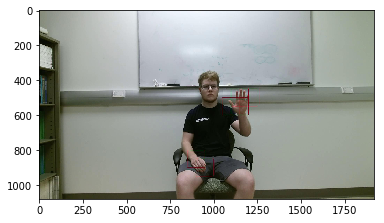

In [29]:
img = Image.open("result.jpg")
print("plt prints the squres incomplete, actual pillow will open the image with image editor or reader")
img.show()
fig, ax = plt.subplots(1)
ax.imshow(img)
plt.show()